# Option Analysis - Liquid Option Discovery & Stats

Find the most liquid and traded BTC option and analyze its trading patterns.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
pd.set_option('display.max_columns', None)

In [13]:
# Load all option metadata to find the most liquid ones
parsed_dir = Path('../parsed/options/')

if not parsed_dir.exists():
    print("Parsed options directory not found. Please run 3_parse_options.py first.")
else:
    print("Loading option metadata...")
    
    options_stats = []
    
    for option_dir in parsed_dir.iterdir():
        if option_dir.is_dir():
            metadata_file = option_dir / 'metadata.json'
            if metadata_file.exists():
                try:
                    with open(metadata_file, 'r') as f:
                        metadata = json.load(f)
                    options_stats.append(metadata)
                except:
                    continue
    
    print(f"Found {len(options_stats)} options with metadata")
    
    # Convert to DataFrame for analysis
    df_options = pd.DataFrame(options_stats)
    
    # Add derived columns with proper datetime parsing
    df_options['expiry_date'] = pd.to_datetime(df_options['expiry_date'])
    df_options['first_trade'] = pd.to_datetime(df_options['first_trade'], format='ISO8601')
    df_options['last_trade'] = pd.to_datetime(df_options['last_trade'], format='ISO8601')
    df_options['trading_days'] = (df_options['last_trade'] - df_options['first_trade']).dt.days + 1
    df_options['avg_trades_per_day'] = df_options['total_trades'] / df_options['trading_days']
    
    print("\n=== TOP 10 MOST LIQUID OPTIONS (by total trades) ===")
    top_by_trades = df_options.nlargest(10, 'total_trades')[['instrument', 'total_trades', 'total_volume', 'trading_days', 'avg_trades_per_day']]
    display(top_by_trades)
    
    print("\n=== TOP 10 MOST LIQUID OPTIONS (by average daily trades) ===")
    top_by_daily = df_options.nlargest(10, 'avg_trades_per_day')[['instrument', 'total_trades', 'total_volume', 'trading_days', 'avg_trades_per_day']]
    display(top_by_daily)


Loading option metadata...
Found 6591 options with metadata

=== TOP 10 MOST LIQUID OPTIONS (by total trades) ===


,instrument,total_trades,total_volume,trading_days,avg_trades_per_day
1737,BTC-27MAR20-10000-C,7194,16314.6,218,33.000000
1639,BTC-26JUN20-10000-C,5865,19208.6,246,23.841463
2364,BTC-27MAR20-8000-C,5068,11285.7,218,23.247706
1779,BTC-26JUN20-8000-P,3766,16619.8,245,15.371429
2766,BTC-26JUN20-9000-C,3526,8021.1,246,14.333333
2758,BTC-27MAR20-9000-C,3470,10345.5,154,22.532468
3328,BTC-26JUN20-9000-P,3399,11136.3,245,13.873469
4210,BTC-26JUN20-7000-P,3370,13643.8,246,13.699187
1798,BTC-27MAR20-8000-P,3009,10510.1,219,13.739726
5769,BTC-27DEC19-7000-P,2983,8969.3,230,12.969565



=== TOP 10 MOST LIQUID OPTIONS (by average daily trades) ===


,instrument,total_trades,total_volume,trading_days,avg_trades_per_day
4555,BTC-28JUN20-8750-P,348,311.1,2,174.000000
679,BTC-7MAY20-9250-P,136,886.0,1,136.000000
4397,BTC-15APR20-7000-C,269,295.0,2,134.500000
3499,BTC-28JUN20-9000-C,258,121.0,2,129.000000
5835,BTC-13APR20-7000-C,255,184.1,2,127.500000
1895,BTC-28JUN20-8875-P,235,157.2,2,117.500000
3386,BTC-28JUN20-9125-C,190,166.9,2,95.000000
293,BTC-11JUN20-10000-C,189,495.9,2,94.500000
3679,BTC-10MAY20-8875-P,185,256.9,2,92.500000
4578,BTC-29MAY20-9250-C,554,1207.5,6,92.333333


In [14]:
# Load all option metadata to find the most liquid ones
parsed_dir = Path('../parsed/options/')

if not parsed_dir.exists():
    print("Parsed options directory not found. Please run 3_parse_options.py first.")
else:
    print("Loading option metadata...")
    
    options_stats = []
    
    for option_dir in parsed_dir.iterdir():
        if option_dir.is_dir():
            metadata_file = option_dir / 'metadata.json'
            if metadata_file.exists():
                try:
                    with open(metadata_file, 'r') as f:
                        metadata = json.load(f)
                    options_stats.append(metadata)
                except:
                    continue
    
    print(f"Found {len(options_stats)} options with metadata")
    
    # Convert to DataFrame for analysis
    df_options = pd.DataFrame(options_stats)
    
    # Add derived columns
    df_options['expiry_date'] = pd.to_datetime(df_options['expiry_date'])
    df_options['first_trade'] = pd.to_datetime(df_options['first_trade'], format='ISO8601')
    df_options['last_trade'] = pd.to_datetime(df_options['last_trade'], format='ISO8601')
    df_options['trading_days'] = (df_options['last_trade'] - df_options['first_trade']).dt.days + 1
    df_options['avg_trades_per_day'] = df_options['total_trades'] / df_options['trading_days']
    
    print("\n=== TOP 10 MOST LIQUID OPTIONS (by total trades) ===")
    top_by_trades = df_options.nlargest(10, 'total_trades')[['instrument', 'total_trades', 'total_volume', 'trading_days', 'avg_trades_per_day']]
    display(top_by_trades)
    
    print("\n=== TOP 10 MOST LIQUID OPTIONS (by average daily trades) ===")
    top_by_daily = df_options.nlargest(10, 'avg_trades_per_day')[['instrument', 'total_trades', 'total_volume', 'trading_days', 'avg_trades_per_day']]
    display(top_by_daily)

Loading option metadata...
Found 6591 options with metadata

=== TOP 10 MOST LIQUID OPTIONS (by total trades) ===


,instrument,total_trades,total_volume,trading_days,avg_trades_per_day
1737,BTC-27MAR20-10000-C,7194,16314.6,218,33.000000
1639,BTC-26JUN20-10000-C,5865,19208.6,246,23.841463
2364,BTC-27MAR20-8000-C,5068,11285.7,218,23.247706
1779,BTC-26JUN20-8000-P,3766,16619.8,245,15.371429
2766,BTC-26JUN20-9000-C,3526,8021.1,246,14.333333
2758,BTC-27MAR20-9000-C,3470,10345.5,154,22.532468
3328,BTC-26JUN20-9000-P,3399,11136.3,245,13.873469
4210,BTC-26JUN20-7000-P,3370,13643.8,246,13.699187
1798,BTC-27MAR20-8000-P,3009,10510.1,219,13.739726
5769,BTC-27DEC19-7000-P,2983,8969.3,230,12.969565



=== TOP 10 MOST LIQUID OPTIONS (by average daily trades) ===


,instrument,total_trades,total_volume,trading_days,avg_trades_per_day
4555,BTC-28JUN20-8750-P,348,311.1,2,174.000000
679,BTC-7MAY20-9250-P,136,886.0,1,136.000000
4397,BTC-15APR20-7000-C,269,295.0,2,134.500000
3499,BTC-28JUN20-9000-C,258,121.0,2,129.000000
5835,BTC-13APR20-7000-C,255,184.1,2,127.500000
1895,BTC-28JUN20-8875-P,235,157.2,2,117.500000
3386,BTC-28JUN20-9125-C,190,166.9,2,95.000000
293,BTC-11JUN20-10000-C,189,495.9,2,94.500000
3679,BTC-10MAY20-8875-P,185,256.9,2,92.500000
4578,BTC-29MAY20-9250-C,554,1207.5,6,92.333333


## 2. Select and Load Most Liquid Option

In [15]:
# Select the most liquid option (highest total trades)
most_liquid = df_options.loc[df_options['total_trades'].idxmax()]
option_name = most_liquid['instrument']

print(f"SELECTED OPTION: {option_name}")
print(f"   Total trades: {most_liquid['total_trades']:,}")
print(f"   Total volume: {most_liquid['total_volume']:.2f}")
print(f"   Trading period: {most_liquid['trading_days']} days")
print(f"   Average daily trades: {most_liquid['avg_trades_per_day']:.1f}")
print(f"   Option type: {most_liquid['option_type']}")
print(f"   Strike: ${most_liquid['strike_price']:,}")
print(f"   Expiry: {most_liquid['expiry_date'].date()}")

# Load the trade data
trades_file = parsed_dir / option_name / 'trades.feather'
df_trades = pd.read_feather(trades_file)

# Add datetime column
df_trades['datetime'] = pd.to_datetime(df_trades['timestamp'], unit='us', utc=True)
df_trades['date'] = df_trades['datetime'].dt.date
df_trades['hour'] = df_trades['datetime'].dt.hour

print(f"\nLoaded {len(df_trades):,} trades")
print(f"   Date range: {df_trades['datetime'].min()} to {df_trades['datetime'].max()}")
print(f"   Price range: ${df_trades['price'].min():.4f} - ${df_trades['price'].max():.4f}")

# Show sample data
display(df_trades.head())

SELECTED OPTION: BTC-27MAR20-10000-C
   Total trades: 7,194
   Total volume: 16314.60
   Trading period: 218 days
   Average daily trades: 33.0
   Option type: CALL
   Strike: $10,000
   Expiry: 2020-03-27

Loaded 7,194 trades
   Date range: 2019-08-21 12:30:09.256000+00:00 to 2020-03-25 23:22:57.273000+00:00
   Price range: $0.0005 - $0.2935


,timestamp,id,price,quantity,is_buyer_maker,instrument,iv,mark_price,index_price,datetime,date,hour
0,1566390609256000,38274331,0.2800,2.0,True,BTC-27MAR20-10000-C,87.15,0.283345,10057.58,2019-08-21 12:30:09.256000+00:00,2019-08-21,12
1,1566394714497000,38290369,0.2920,1.0,True,BTC-27MAR20-10000-C,92.75,0.280039,9942.02,2019-08-21 13:38:34.497000+00:00,2019-08-21,13
2,1566395495058000,38291523,0.2885,9.0,True,BTC-27MAR20-10000-C,91.41,0.280999,9947.73,2019-08-21 13:51:35.058000+00:00,2019-08-21,13
3,1566409449797000,38319997,0.2935,0.5,True,BTC-27MAR20-10000-C,91.30,0.285699,10096.28,2019-08-21 17:44:09.797000+00:00,2019-08-21,17
4,1566438378167000,38356814,0.2830,1.0,False,BTC-27MAR20-10000-C,91.00,0.279413,9896.83,2019-08-22 01:46:18.167000+00:00,2019-08-22,1


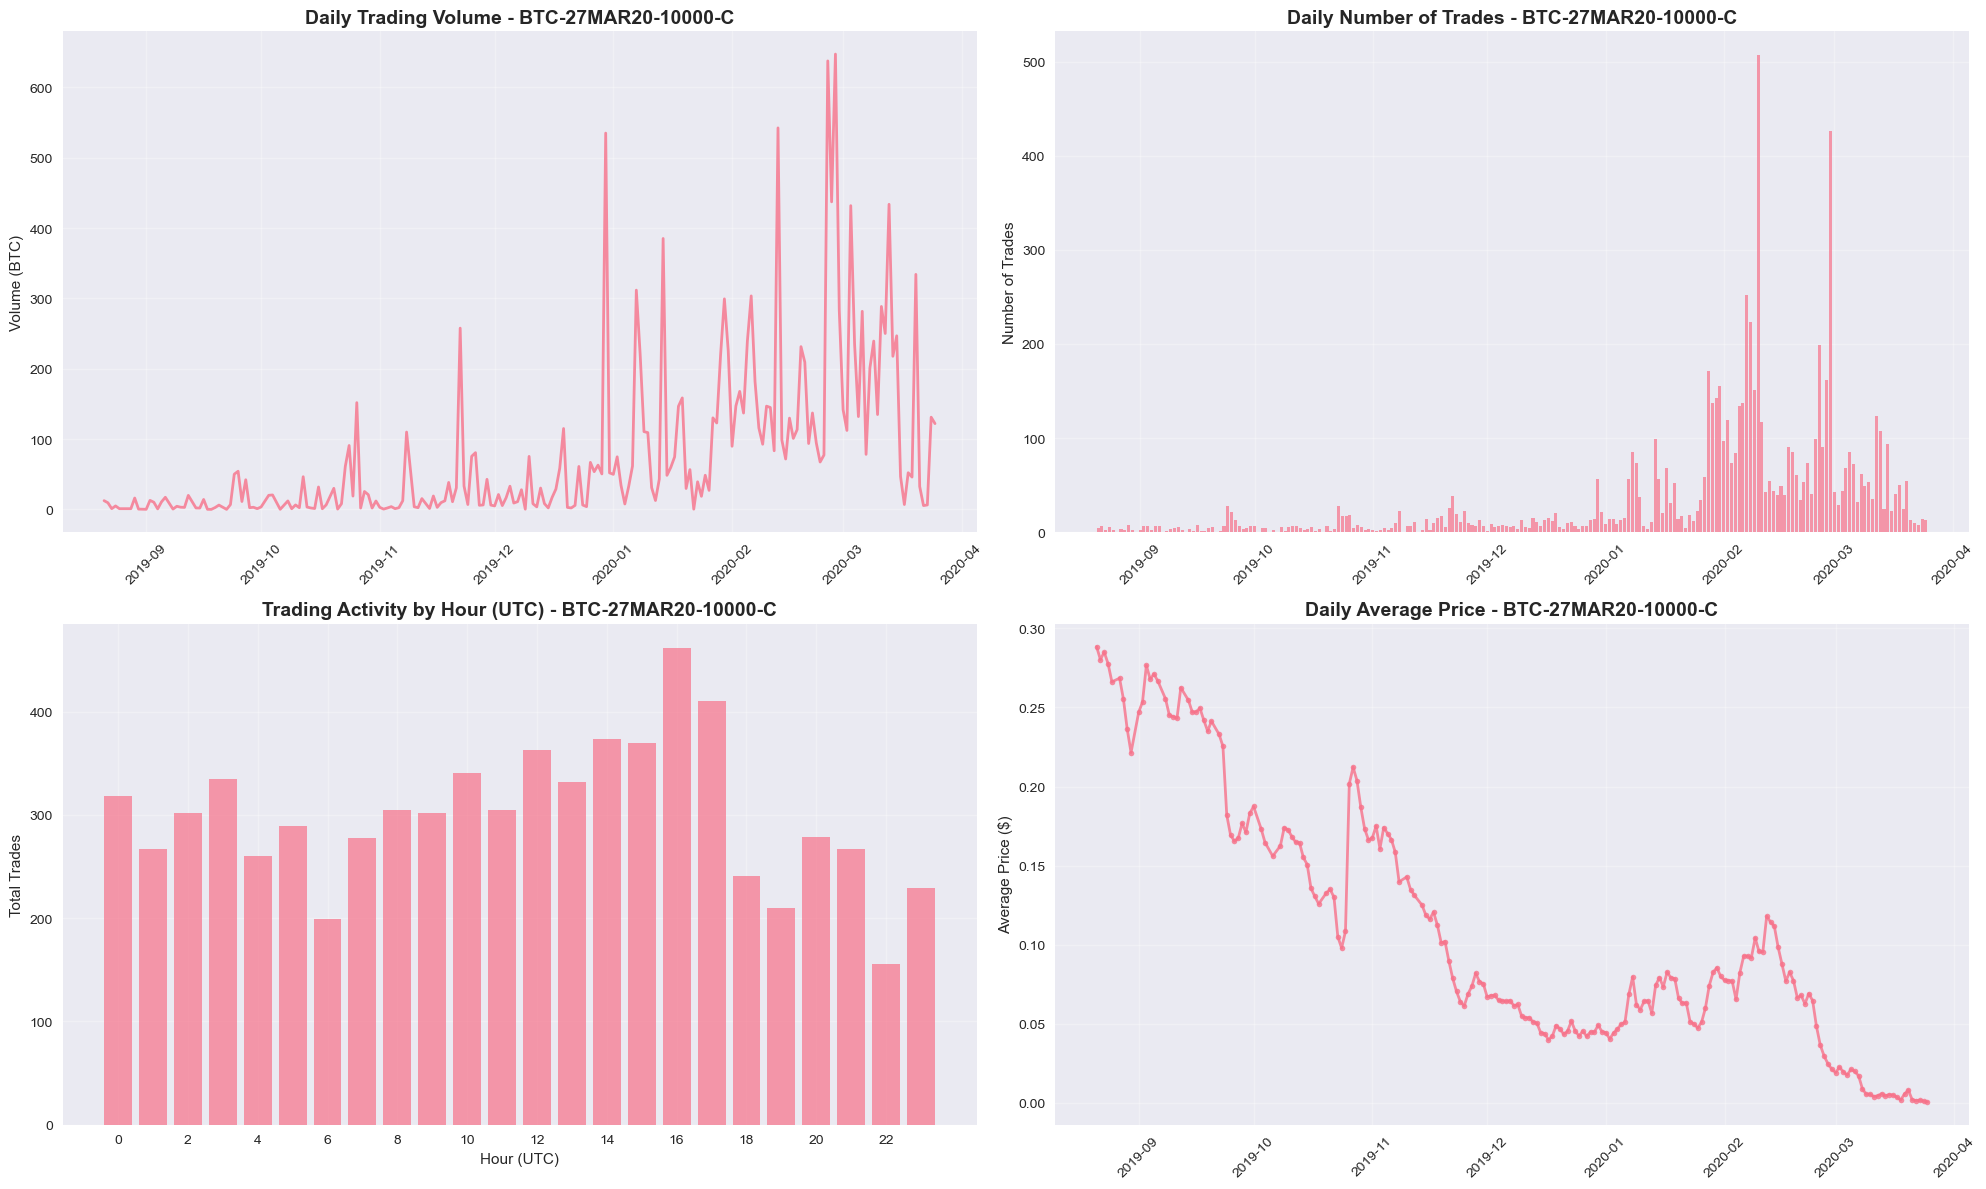


TRADING STATISTICS for BTC-27MAR20-10000-C:
   Total volume: 16314.60 BTC
   Average daily volume: 78.81 BTC
   Peak daily volume: 647.20 BTC on 2020-02-28
   Average daily trades: 35
   Peak daily trades: 507 on 2020-02-10
   Most active hour: 16:00 UTC (462 total trades)


In [16]:
# Create comprehensive trading analysis plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Daily Trading Volume
daily_stats = df_trades.groupby('date').agg({
    'quantity': 'sum',
    'price': ['count', 'mean'],
    'datetime': ['min', 'max']
}).round(4)

daily_stats.columns = ['volume', 'trades', 'avg_price', 'first_trade', 'last_trade']
daily_stats.index = pd.to_datetime(daily_stats.index)

ax1.plot(daily_stats.index, daily_stats['volume'], alpha=0.8, linewidth=2)
ax1.set_title(f'Daily Trading Volume - {option_name}', fontsize=14, fontweight='bold')
ax1.set_ylabel('Volume (BTC)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Daily Number of Trades
ax2.bar(daily_stats.index, daily_stats['trades'], alpha=0.7, width=0.8)
ax2.set_title(f'Daily Number of Trades - {option_name}', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Trades')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Hourly Trading Activity
hourly_trades = df_trades.groupby('hour').size()
ax3.bar(hourly_trades.index, hourly_trades.values, alpha=0.7)
ax3.set_title(f'Trading Activity by Hour (UTC) - {option_name}', fontsize=14, fontweight='bold')
ax3.set_xlabel('Hour (UTC)')
ax3.set_ylabel('Total Trades')
ax3.set_xticks(range(0, 24, 2))
ax3.grid(True, alpha=0.3)

# 4. Price Evolution
ax4.plot(daily_stats.index, daily_stats['avg_price'], 'o-', alpha=0.8, linewidth=2, markersize=4)
ax4.set_title(f'Daily Average Price - {option_name}', fontsize=14, fontweight='bold')
ax4.set_ylabel('Average Price ($)')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTRADING STATISTICS for {option_name}:")
print(f"   Total volume: {daily_stats['volume'].sum():.2f} BTC")
print(f"   Average daily volume: {daily_stats['volume'].mean():.2f} BTC")
print(f"   Peak daily volume: {daily_stats['volume'].max():.2f} BTC on {daily_stats['volume'].idxmax().date()}")
print(f"   Average daily trades: {daily_stats['trades'].mean():.0f}")
print(f"   Peak daily trades: {daily_stats['trades'].max()} on {daily_stats['trades'].idxmax().date()}")
print(f"   Most active hour: {hourly_trades.idxmax()}:00 UTC ({hourly_trades.max()} total trades)")

## 4. Price and Volatility Analysis

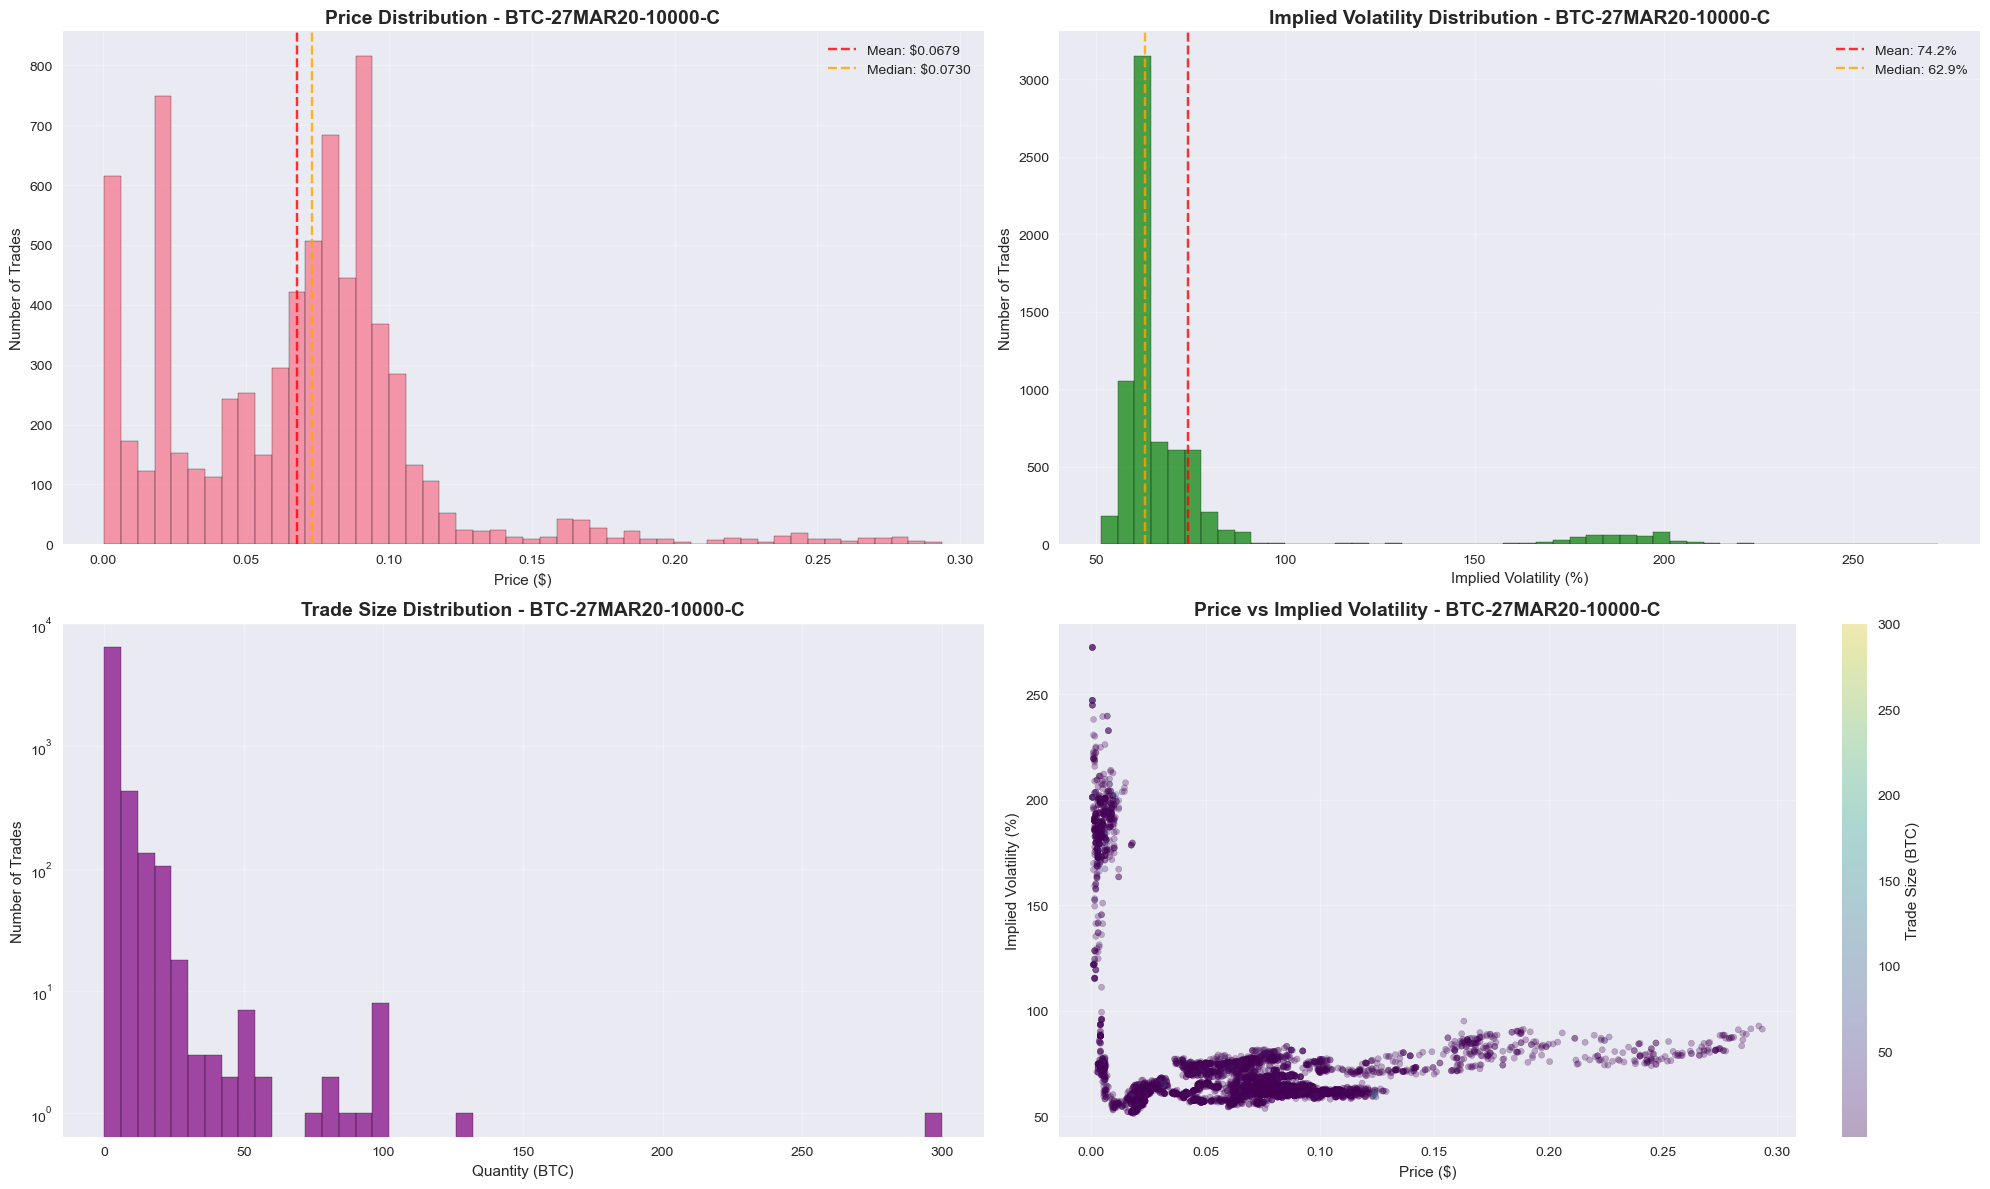


PRICE & VOLATILITY STATISTICS for BTC-27MAR20-10000-C:
   Price range: $0.0005 - $0.2935
   Price volatility: 0.0448
   IV range: 51.3% - 272.4%
   Average trade size: 2.2678 BTC
   Largest trade: 300.0000 BTC
   Buy/Sell ratio: 3753/3441 (buy/sell)


In [17]:
# Detailed price and volatility analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Price Distribution
ax1.hist(df_trades['price'], bins=50, alpha=0.7, edgecolor='black')
ax1.axvline(df_trades['price'].mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: ${df_trades["price"].mean():.4f}')
ax1.axvline(df_trades['price'].median(), color='orange', linestyle='--', alpha=0.8, label=f'Median: ${df_trades["price"].median():.4f}')
ax1.set_title(f'Price Distribution - {option_name}', fontsize=14, fontweight='bold')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Number of Trades')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Implied Volatility Distribution
ax2.hist(df_trades['iv'], bins=50, alpha=0.7, edgecolor='black', color='green')
ax2.axvline(df_trades['iv'].mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: {df_trades["iv"].mean():.1f}%')
ax2.axvline(df_trades['iv'].median(), color='orange', linestyle='--', alpha=0.8, label=f'Median: {df_trades["iv"].median():.1f}%')
ax2.set_title(f'Implied Volatility Distribution - {option_name}', fontsize=14, fontweight='bold')
ax2.set_xlabel('Implied Volatility (%)')
ax2.set_ylabel('Number of Trades')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Trade Size Distribution
ax3.hist(df_trades['quantity'], bins=50, alpha=0.7, edgecolor='black', color='purple')
ax3.set_title(f'Trade Size Distribution - {option_name}', fontsize=14, fontweight='bold')
ax3.set_xlabel('Quantity (BTC)')
ax3.set_ylabel('Number of Trades')
ax3.set_yscale('log')  # Log scale for better visibility
ax3.grid(True, alpha=0.3)

# 4. Price vs IV Scatter
scatter = ax4.scatter(df_trades['price'], df_trades['iv'], alpha=0.3, s=20, c=df_trades['quantity'], cmap='viridis')
ax4.set_title(f'Price vs Implied Volatility - {option_name}', fontsize=14, fontweight='bold')
ax4.set_xlabel('Price ($)')
ax4.set_ylabel('Implied Volatility (%)')
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Trade Size (BTC)')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\nPRICE & VOLATILITY STATISTICS for {option_name}:")
print(f"   Price range: ${df_trades['price'].min():.4f} - ${df_trades['price'].max():.4f}")
print(f"   Price volatility: {df_trades['price'].std():.4f}")
print(f"   IV range: {df_trades['iv'].min():.1f}% - {df_trades['iv'].max():.1f}%")
print(f"   Average trade size: {df_trades['quantity'].mean():.4f} BTC")
print(f"   Largest trade: {df_trades['quantity'].max():.4f} BTC")
print(f"   Buy/Sell ratio: {(~df_trades['is_buyer_maker']).sum()}/{df_trades['is_buyer_maker'].sum()} (buy/sell)")

## 5. Time-to-Expiry Analysis

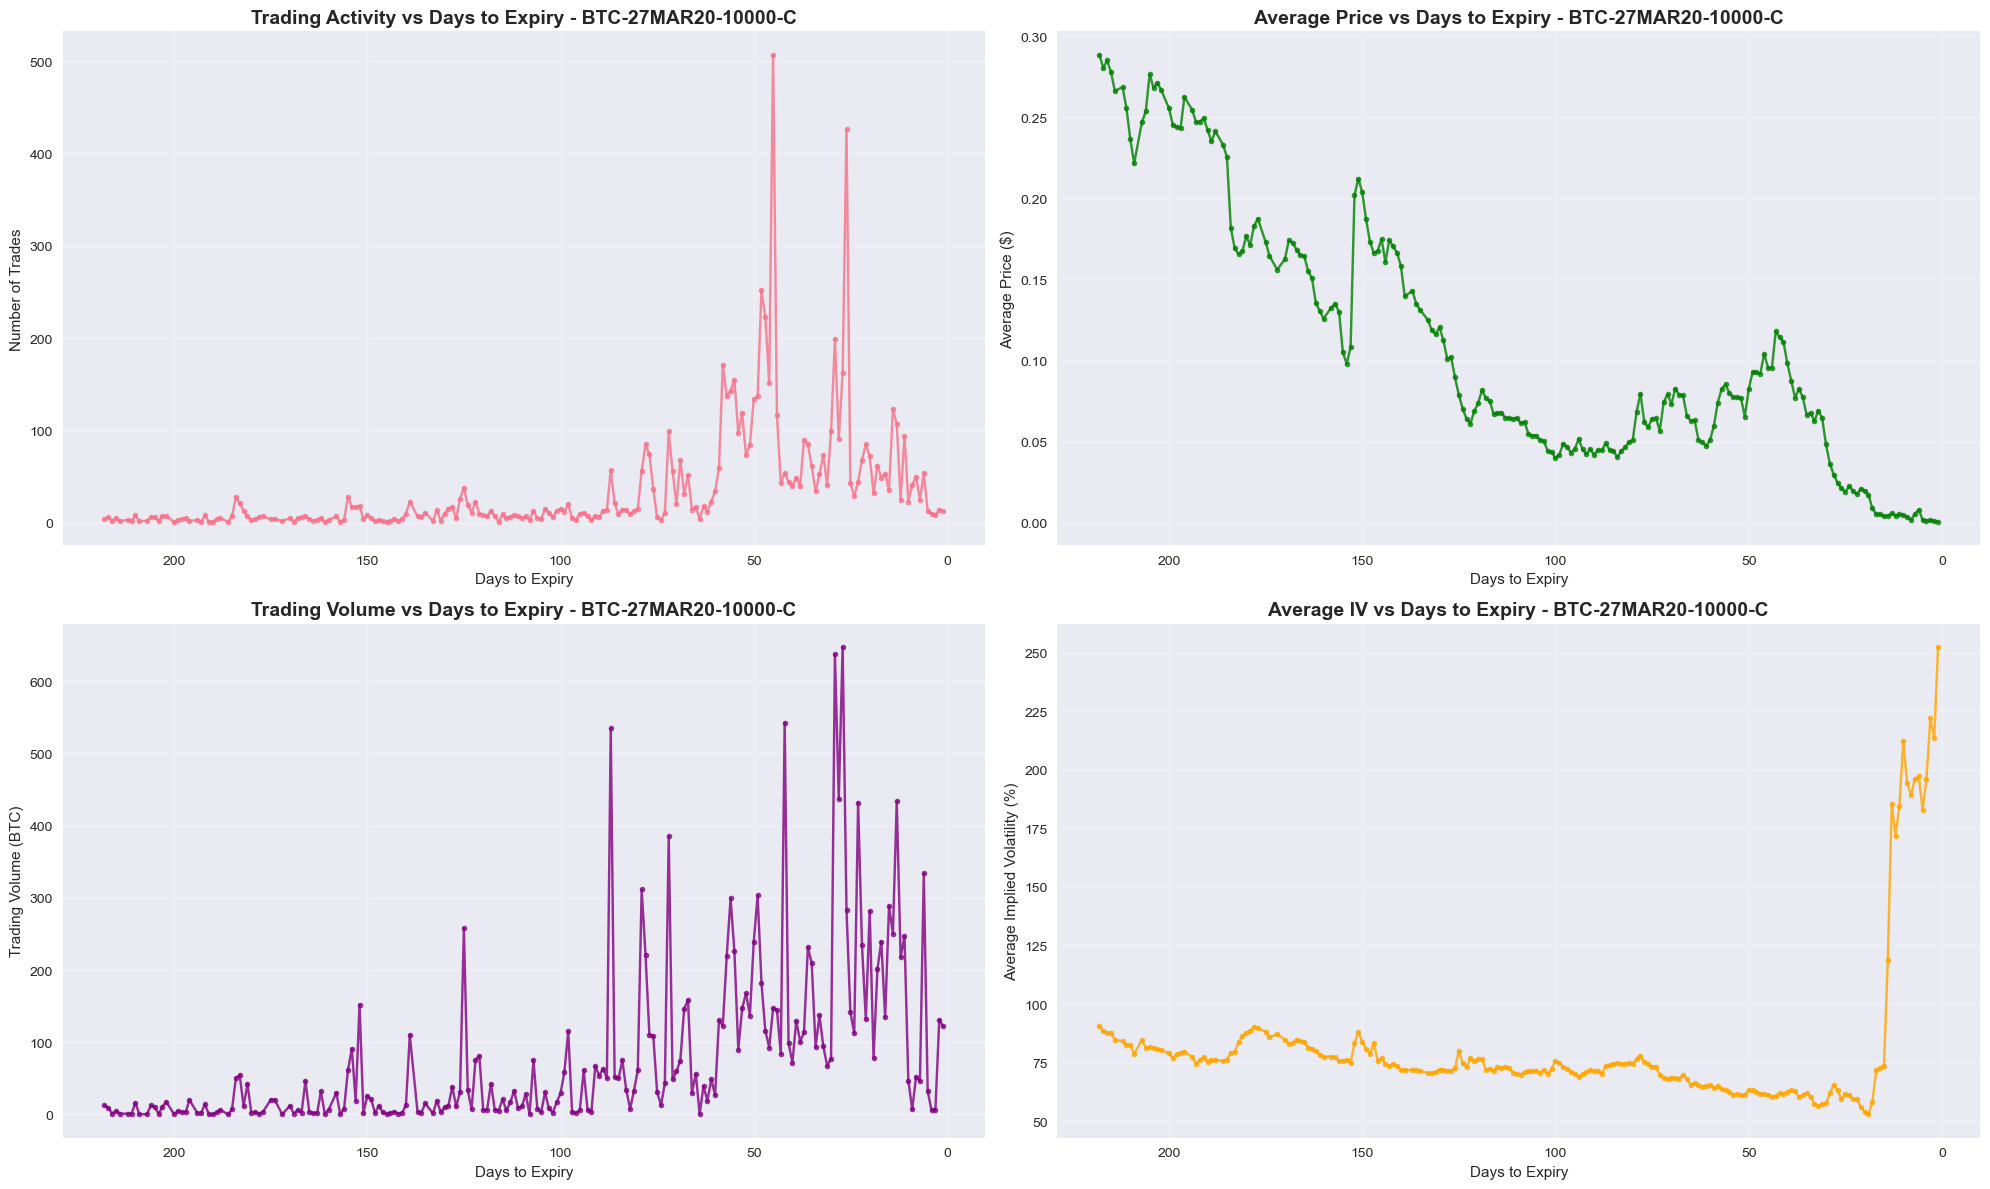


TIME-TO-EXPIRY INSIGHTS for BTC-27MAR20-10000-C:
   Most active period: 45 days before expiry (507 trades)
   Highest volume period: 27 days before expiry (647.20 BTC)
   Price trend: 0.0006 → 0.2885 (early → late)
   IV trend: 252.4% → 90.7% (early → late)


In [18]:
# Calculate time to expiry for each trade
expiry_date = pd.to_datetime(most_liquid['expiry_date']).tz_localize('UTC')  # Make timezone-aware
df_trades['days_to_expiry'] = (expiry_date - df_trades['datetime']).dt.days

# Group by days to expiry
expiry_analysis = df_trades.groupby('days_to_expiry').agg({
    'price': ['count', 'mean', 'std'],
    'quantity': 'sum',
    'iv': 'mean'
}).round(4)

expiry_analysis.columns = ['trades', 'avg_price', 'price_std', 'volume', 'avg_iv']
expiry_analysis = expiry_analysis[expiry_analysis.index >= 0]  # Only positive days to expiry

# Create time-to-expiry plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Trading activity vs time to expiry
ax1.plot(expiry_analysis.index, expiry_analysis['trades'], 'o-', alpha=0.8, markersize=4)
ax1.set_title(f'Trading Activity vs Days to Expiry - {option_name}', fontsize=14, fontweight='bold')
ax1.set_xlabel('Days to Expiry')
ax1.set_ylabel('Number of Trades')
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()  # Show approaching expiry

# 2. Average price vs time to expiry
ax2.plot(expiry_analysis.index, expiry_analysis['avg_price'], 'o-', alpha=0.8, markersize=4, color='green')
ax2.set_title(f'Average Price vs Days to Expiry - {option_name}', fontsize=14, fontweight='bold')
ax2.set_xlabel('Days to Expiry')
ax2.set_ylabel('Average Price ($)')
ax2.grid(True, alpha=0.3)
ax2.invert_xaxis()

# 3. Volume vs time to expiry
ax3.plot(expiry_analysis.index, expiry_analysis['volume'], 'o-', alpha=0.8, markersize=4, color='purple')
ax3.set_title(f'Trading Volume vs Days to Expiry - {option_name}', fontsize=14, fontweight='bold')
ax3.set_xlabel('Days to Expiry')
ax3.set_ylabel('Trading Volume (BTC)')
ax3.grid(True, alpha=0.3)
ax3.invert_xaxis()

# 4. Implied volatility vs time to expiry
ax4.plot(expiry_analysis.index, expiry_analysis['avg_iv'], 'o-', alpha=0.8, markersize=4, color='orange')
ax4.set_title(f'Average IV vs Days to Expiry - {option_name}', fontsize=14, fontweight='bold')
ax4.set_xlabel('Days to Expiry')
ax4.set_ylabel('Average Implied Volatility (%)')
ax4.grid(True, alpha=0.3)
ax4.invert_xaxis()

plt.tight_layout()
plt.show()

# Summary insights
print(f"\nTIME-TO-EXPIRY INSIGHTS for {option_name}:")
print(f"   Most active period: {expiry_analysis['trades'].idxmax()} days before expiry ({expiry_analysis['trades'].max()} trades)")
print(f"   Highest volume period: {expiry_analysis['volume'].idxmax()} days before expiry ({expiry_analysis['volume'].max():.2f} BTC)")
print(f"   Price trend: {expiry_analysis['avg_price'].iloc[0]:.4f} → {expiry_analysis['avg_price'].iloc[-1]:.4f} (early → late)")
print(f"   IV trend: {expiry_analysis['avg_iv'].iloc[0]:.1f}% → {expiry_analysis['avg_iv'].iloc[-1]:.1f}% (early → late)")